In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
idata=pd.read_csv("insurance_data.csv")

In [8]:
idata.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [9]:
idata.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [10]:
idata.shape #check the shape of data means rows and columns

(1000, 40)

In [11]:
type(idata) #check the data type

pandas.core.frame.DataFrame

In [12]:
idata.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [13]:
#no null values in our dataset.

In [14]:
idata.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [15]:
idata.drop("_c39", axis=1) #_c39 is fully null columns so we can remove

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [16]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

N    753
Y    247
Name: fraud_reported, dtype: int64

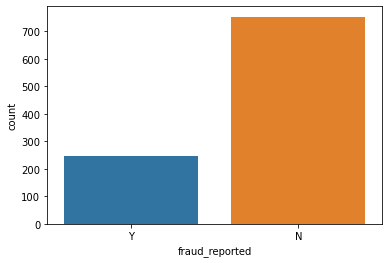

In [17]:
sns.countplot('fraud_reported',data=idata)
idata["fraud_reported"].value_counts()

maximum values is "no"

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

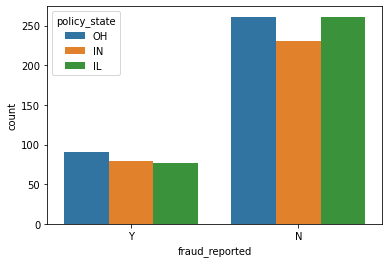

In [18]:
sns.countplot(x='fraud_reported',hue='policy_state',data=idata)
idata["policy_state"].value_counts()

maximum fraud happend in OH if iwe check with satate

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

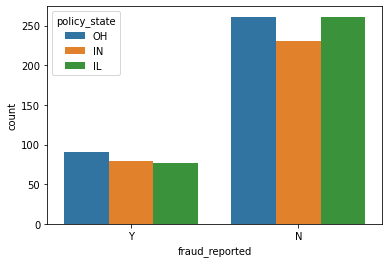

In [19]:
sns.countplot(x='fraud_reported',hue='policy_state',data=idata)
idata["policy_state"].value_counts()

In [20]:
occupation = idata['insured_occupation'].value_counts()
occupation

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

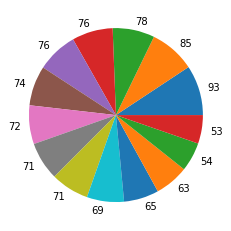

In [21]:
plt.pie(occupation,labels=occupation)
plt.show()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

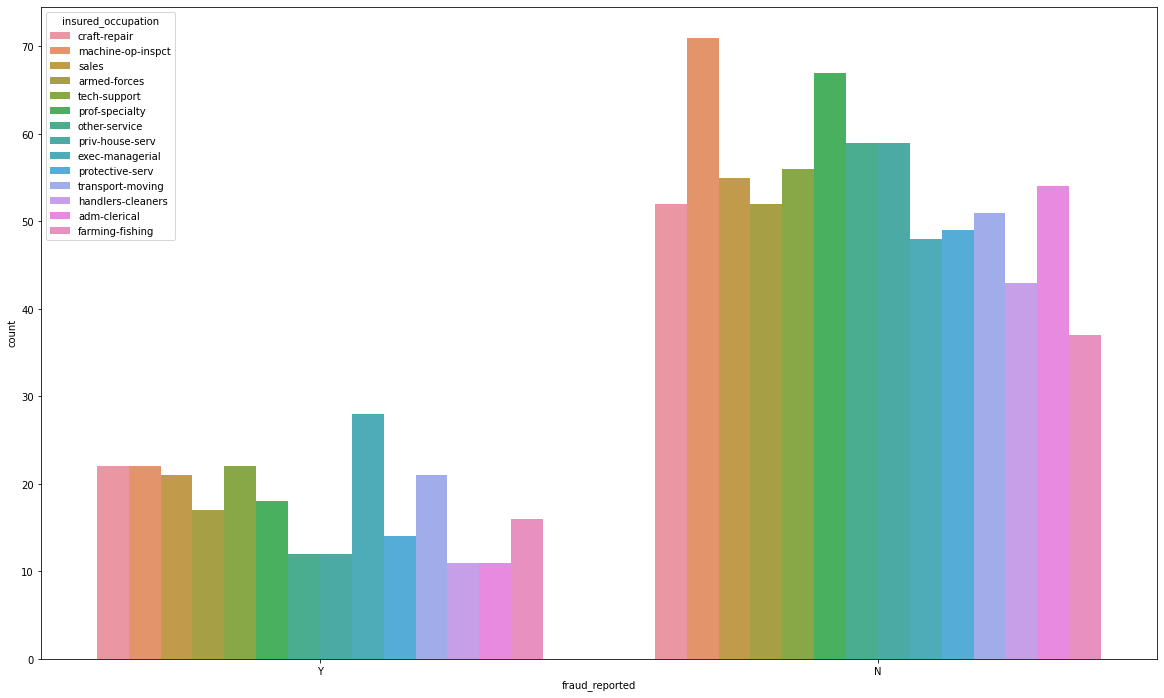

In [22]:
plt.figure(figsize=(20,12))
sns.countplot(x=idata['fraud_reported'],hue=idata['insured_occupation'],data=idata)
idata['fraud_reported'].value_counts()
idata['insured_occupation'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

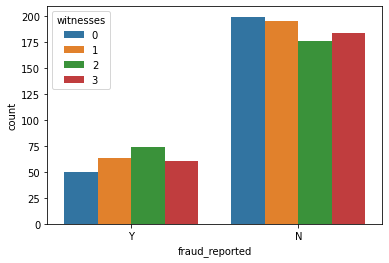

In [23]:
sns.countplot(idata['fraud_reported'],hue='witnesses',data=idata)
idata['witnesses'].value_counts()

<AxesSubplot:xlabel='witnesses', ylabel='count'>

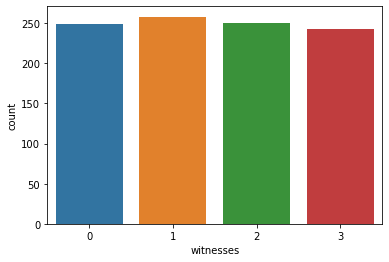

In [24]:
sns.countplot(idata["witnesses"],data=idata)

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

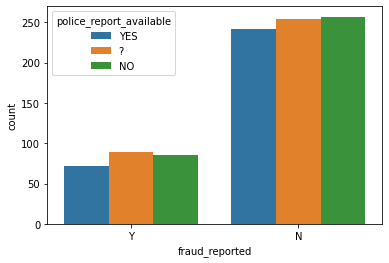

In [25]:
sns.countplot(x=idata['fraud_reported'],hue='police_report_available',data=idata)
idata["police_report_available"].value_counts()

there is missing values available

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

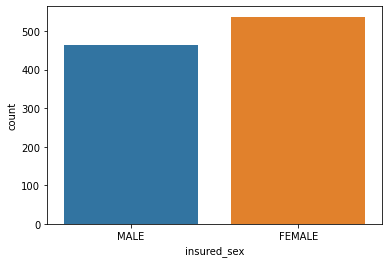

In [26]:
sns.countplot(x='insured_sex', data=idata)

In [27]:
idata.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Density'>

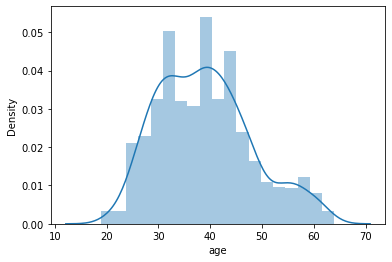

In [28]:
sns.distplot(idata["age"])

maximum value between 30 to 45 ages

Text(0.5, 1.0, 'Different Types of educated person that Insured')

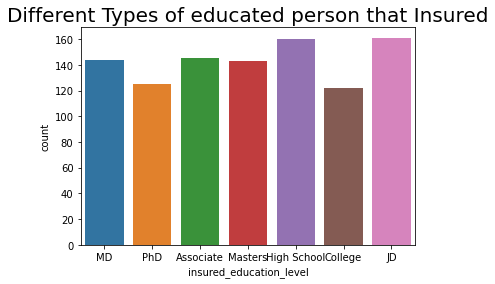

In [29]:
sns.countplot(x='insured_education_level', data=idata)
idata['insured_education_level'].value_counts()
plt.title('Different Types of educated person that Insured', fontsize = 20)



accoudint to aduction more pepeple belong to JD and less peple from COLLEGE

Text(0.5, 1.0, 'insured_hobbies means people like most')

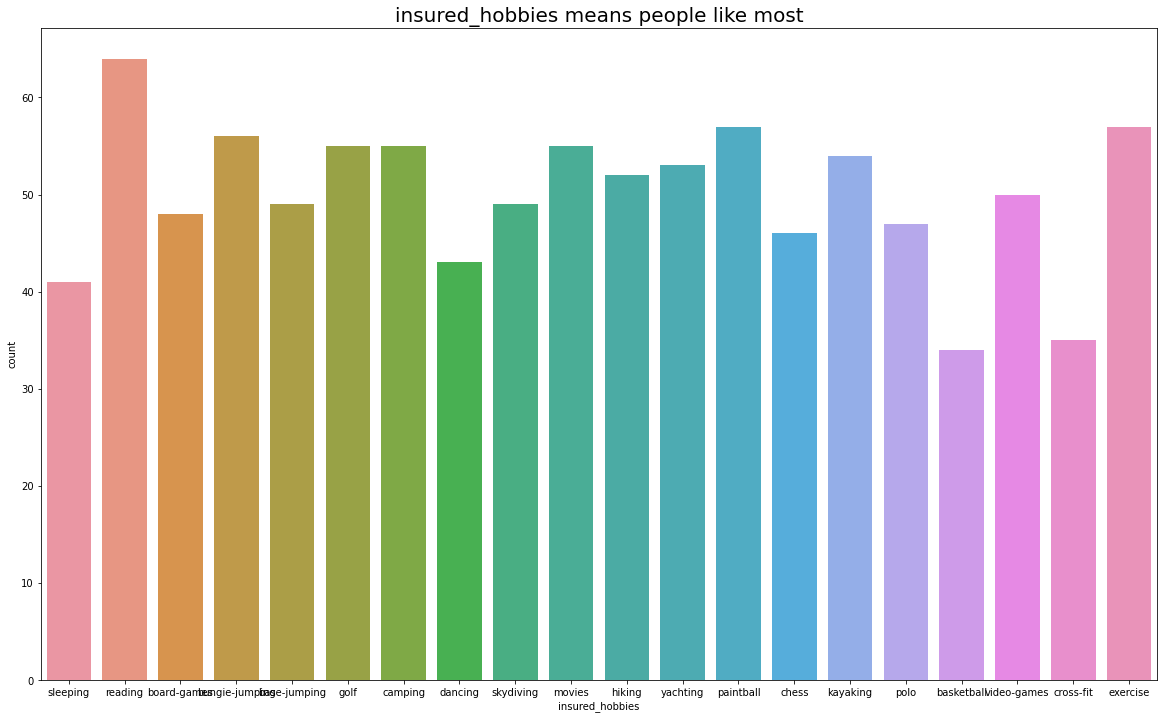

In [30]:
plt.figure(figsize=(20,12))
sns.countplot(x='insured_hobbies', data=idata)
idata['insured_hobbies'].value_counts()
plt.title('insured_hobbies means people like most',fontsize=20)


most oh peopel how are insured like readind and less peopel like basketball

Text(0.5, 1.0, 'Different Types of relationshipe of Insured')

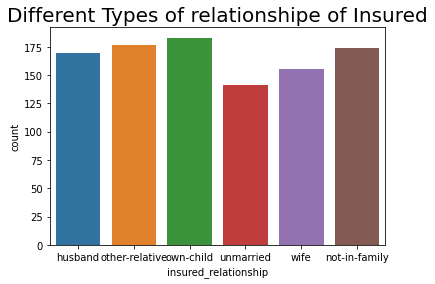

In [31]:
sns.countplot(x='insured_relationship', data=idata)
idata['insured_relationship'].value_counts()
plt.title('Different Types of relationshipe of Insured', fontsize = 20)

if we check the relationship maximum value for own chiled and lowest values is unmarried

Text(0.5, 1.0, ' Types of incident')

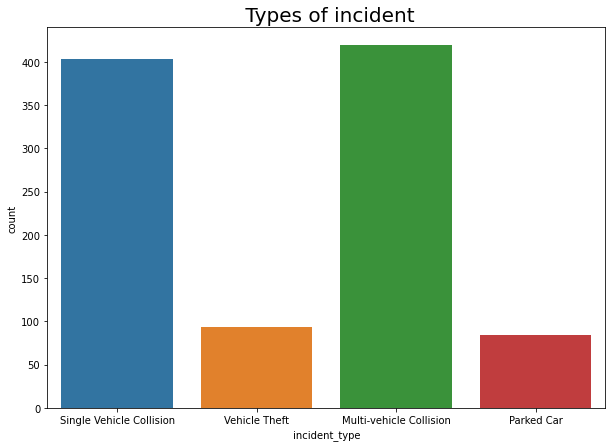

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='incident_type', data=idata)
idata['incident_type'].value_counts()
plt.title(' Types of incident', fontsize = 20)


incidentwise max value Multi-vehicle Collision less values parked car

Text(0.5, 1.0, 'Different Types of collision')

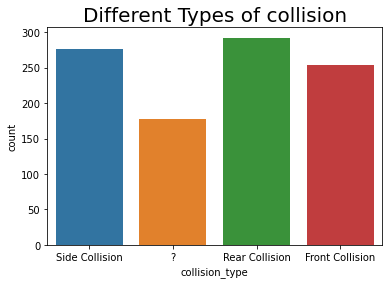

In [33]:
sns.countplot(x='collision_type', data=idata)
idata['collision_type'].value_counts()
plt.title('Different Types of collision', fontsize = 20)

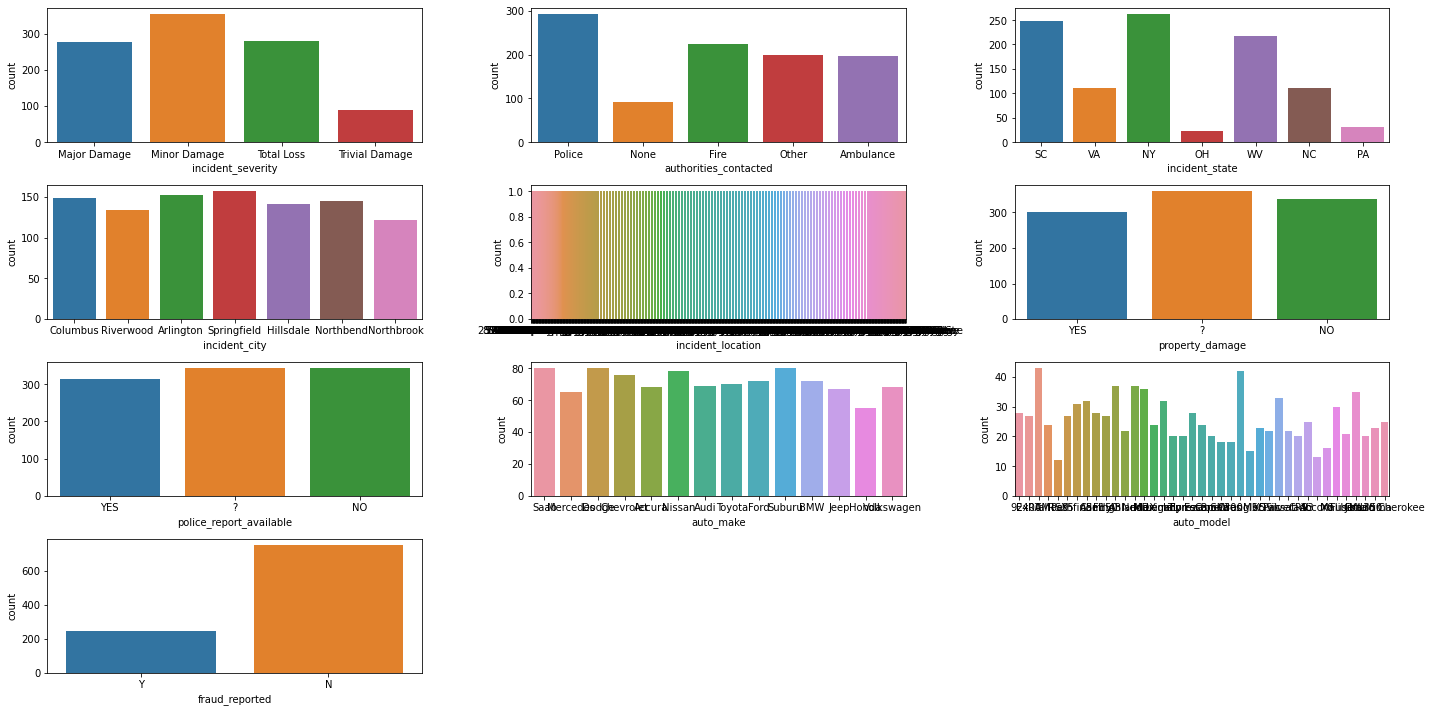

In [34]:
fig = plt.figure(figsize=(20,10))



sub9 = plt.subplot(4, 3, 1)
sns.countplot(x='incident_severity', data=idata)
sub9 = plt.subplot(4, 3, 2)
sns.countplot(x='authorities_contacted', data=idata)
sub9 = plt.subplot(4, 3, 3)
sns.countplot(x='incident_state', data=idata)
sub9 = plt.subplot(4, 3, 4)
sns.countplot(x='incident_city', data=idata)
sub9 = plt.subplot(4, 3, 5)
sns.countplot(x='incident_location', data=idata)
sub9 = plt.subplot(4, 3, 6)
sns.countplot(x='property_damage', data=idata)
sub9 = plt.subplot(4, 3, 7)
sns.countplot(x='police_report_available', data=idata)
sub9 = plt.subplot(4, 3, 8)
sns.countplot(x='auto_make', data=idata)
sub9 = plt.subplot(4, 3, 9)
sns.countplot(x='auto_model', data=idata)
sub9 = plt.subplot(4, 3, 10)
sns.countplot(x='fraud_reported', data=idata)
    
fig.tight_layout()
plt.show()

In [35]:
idata=idata.drop(['months_as_customer','policy_number','policy_bind_date','policy_csl','auto_year','auto_model','insured_hobbies','insured_zip','witnesses'],axis=1)

In [36]:
idata.columns

Index(['age', 'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'fraud_reported',
       '_c39'],
      dtype='object')

In [37]:
idata=idata.drop(['_c39'],axis=1)

In [38]:
idata.head(2)

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,48,OH,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,YES,71610,6510,13020,52080,Saab,Y
1,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,?,0,?,5070,780,780,3510,Mercedes,Y


# remove null values

In [39]:
idata['police_report_available']=idata['police_report_available'].replace({'?':np.nan})
idata['police_report_available'].fillna(idata['police_report_available'].mode()[0],inplace = True)

In [40]:
idata.isnull().sum()

age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
fraud_reported                 0
dtype: int

In [41]:
idata['collision_type']=idata['collision_type'].replace({'?':np.nan})
idata['collision_type'].fillna(idata['collision_type'].mode()[0],inplace = True)

idata['property_damage']=idata['property_damage'].replace({'?':np.nan})
idata['property_damage'].fillna(idata['property_damage'].mode()[0],inplace = True)

In [42]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   policy_state                 1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_date                1000 non-null   object 
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [43]:
objectcols = [col for col in idata.columns if idata[col].dtype == 'object']
objectcols

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'fraud_reported']

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

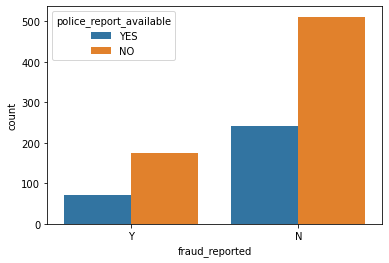

In [44]:
sns.countplot(x=idata['fraud_reported'],hue='police_report_available',data=idata)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

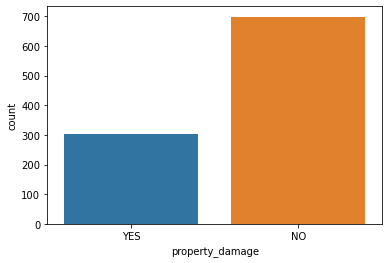

In [45]:
sns.countplot(idata['property_damage'])

In [46]:
idata.isnull().sum()

age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
fraud_reported                 0
dtype: int

there is null values present becous on the null values "?" was present so we replace the "?" by NAN.

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

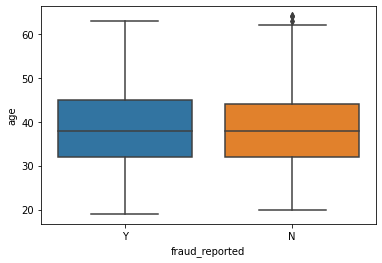

In [47]:
#sns.boxplot(["age"],data=idata)
sns.boxplot(y="age", x="fraud_reported", data=idata)

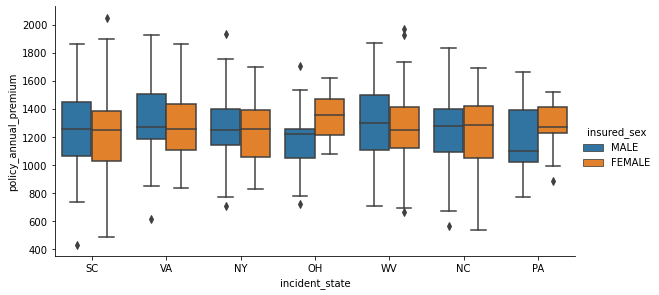

In [48]:
sns.catplot(y="policy_annual_premium", x="incident_state",
                hue="insured_sex",
                data=idata, kind="box",
                height=4, aspect=2);

outliers present in every state

# lebelencoder

In [49]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [50]:
objectcols
for var in objectcols:
    le = preprocessing.LabelEncoder()
    idata[var]=le.fit_transform(idata[var].astype('str'))
idata.dtypes

age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
police_report_available          int32
total_claim_amount               int64
injury_claim             

In [51]:
idata.head()

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,48,2,1000,1406.91,0,1,4,2,0,53300,...,1,1,1,1,71610,6510,13020,52080,10,1
1,42,1,2000,1197.22,5000000,1,4,6,2,0,...,1,0,0,0,5070,780,780,3510,8,1
2,29,2,2000,1413.14,5000000,0,6,11,3,35100,...,3,0,2,0,34650,7700,3850,23100,4,0
3,41,0,2000,1415.74,6000000,0,6,1,4,48900,...,1,0,1,0,63400,6340,6340,50720,3,1
4,44,0,1000,1583.91,6000000,1,0,11,4,66000,...,1,0,0,0,6500,1300,650,4550,0,0


<AxesSubplot:>

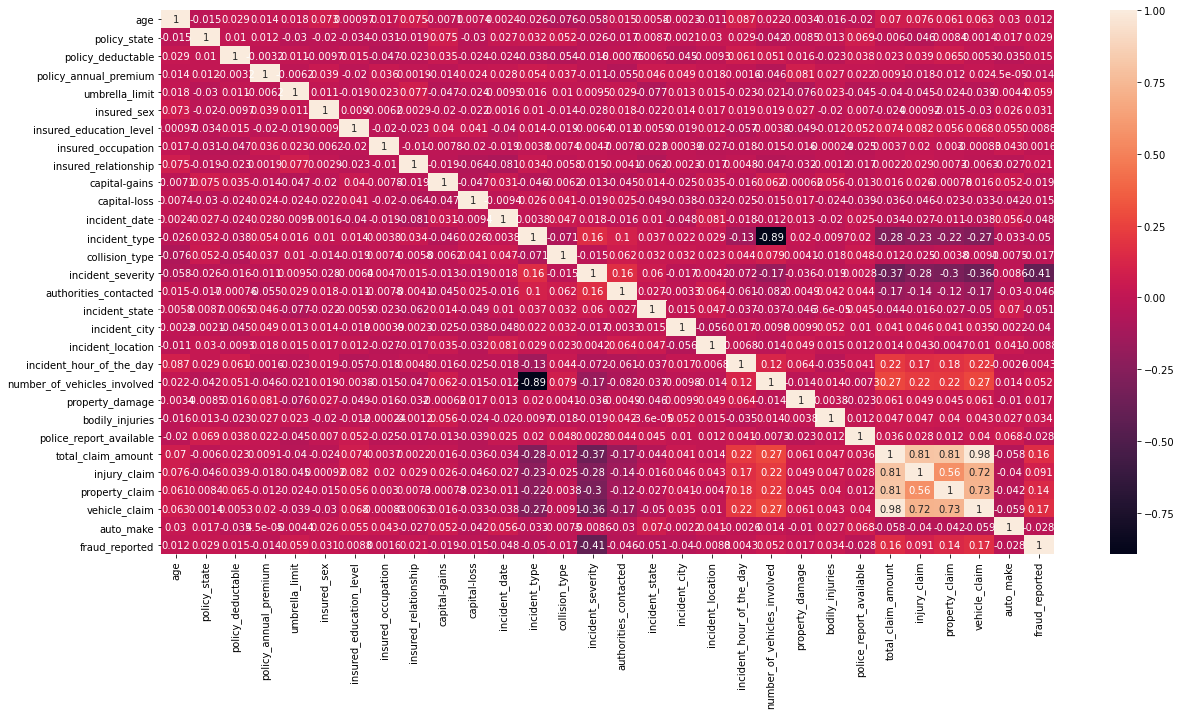

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(idata.corr(),annot=True)

total_claim_amount is higly correlated

In [53]:
idata.skew()   #check the skewness in our data

age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
police_report_available        0.802728
total_claim_amount            -0.594582


not highly skew data

In [54]:
y=idata['fraud_reported']
x=idata.drop(['fraud_reported'],axis=1)

# scaling the data

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# split the data 

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=30)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix


# model performance

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
pred_val = LR_model.predict(x_test)
print(accuracy_score(y_test,pred_val))
print(confusion_matrix(y_test,pred_val))
print(classification_report(y_test,pred_val))


0.81
[[143  11]
 [ 27  19]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       154
           1       0.63      0.41      0.50        46

    accuracy                           0.81       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.79      0.81      0.79       200



In [60]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [62]:
knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_val=knn.predict(x_test)

print(accuracy_score(y_test,pred_val))
print(confusion_matrix(y_test,pred_val))
print(classification_report(y_test,pred_val))


0.76
[[152   2]
 [ 46   0]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       154
           1       0.00      0.00      0.00        46

    accuracy                           0.76       200
   macro avg       0.38      0.49      0.43       200
weighted avg       0.59      0.76      0.66       200



In [63]:
classifier = DecisionTreeClassifier() 
classifier.fit(x_train, y_train)
pred_val = classifier.predict(x_test)
print(accuracy_score(y_test,pred_val))
print(confusion_matrix(y_test,pred_val))
print(classification_report(y_test,pred_val))


0.74
[[127  27]
 [ 25  21]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       154
           1       0.44      0.46      0.45        46

    accuracy                           0.74       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.74      0.74      0.74       200



In [64]:
from sklearn.svm import SVC
sr=SVC()
sr.fit(x_train,y_train)
pred_val=sr.predict(x_test)
print(accuracy_score(y_test,pred_val))
print(confusion_matrix(y_test,pred_val))
print(classification_report(y_test,pred_val))


0.77
[[148   6]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       154
           1       0.50      0.13      0.21        46

    accuracy                           0.77       200
   macro avg       0.64      0.55      0.54       200
weighted avg       0.72      0.77      0.71       200



In [65]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_val=lr.predict(x_test)
print(accuracy_score(y_test,pred_val))
print(confusion_matrix(y_test,pred_val))
print(classification_report(y_test,pred_val))


0.81
[[143  11]
 [ 27  19]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       154
           1       0.63      0.41      0.50        46

    accuracy                           0.81       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.79      0.81      0.79       200



In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_val=rf.predict(x_test)
print(accuracy_score(y_test,pred_val))
print(confusion_matrix(y_test,pred_val))
print(classification_report(y_test,pred_val))

0.815
[[146   8]
 [ 29  17]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       154
           1       0.68      0.37      0.48        46

    accuracy                           0.81       200
   macro avg       0.76      0.66      0.68       200
weighted avg       0.80      0.81      0.79       200



In [67]:
d = {"accuracy score": {"LogisticRegression":0.81, "KNeighborsClassifier":0.76, "SVC":0.77,
                  " RandomForestClassifier":0.78," DecisionTreeClassifier":0.725}}
d
df = pd.DataFrame(d)
df

,accuracy score
DecisionTreeClassifier,0.725
RandomForestClassifier,0.780
KNeighborsClassifier,0.760
LogisticRegression,0.810
SVC,0.770


accuracy of the models

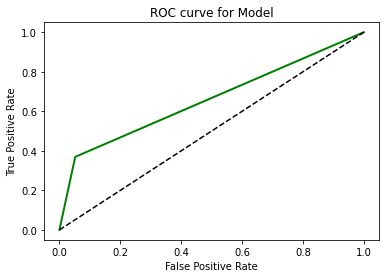

In [68]:

#Plot the AUC-ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_val)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=2,markersize=12)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()